## Лабораторная работа "Линейные модели"

Некоторые задачи в этом ноутбуке надо будет сдавать в [контест](https://new.contest.yandex.ru/60377/start). Когда сдаете туда код, не забудьте сверху прописать все нужные импорты.

Мы рассчитываем, что перед тем, как садиться за этот ноутбук, вы прочитали часть про регрессию главы "Линейные модели" хендбука по ML.

Начнём с загрузки необходимых библиотек и функций.

Параметр `seed` будет использоваться далее для инициализации генератора случайных чисел из библиотеки `numpy`.

In [381]:
import numpy as np
import pandas as pd
from typing import Optional, List

import sklearn.base

seed = 24

В этом ноутбуке мы будем практиковаться на датасете ["The Ames Iowa Housing Data"](https://www.openml.org/d/41211). Здесь собраны описания и цены жилья в городе Эймс, штат Айова. Мы будем решать задачу предсказания цены (`Sale_Price`) по всем остальным признакам.

И начнём мы, конечно, с того, что внимательно посмотрим на датасет: какие там есть объекты и какие признаки.

In [382]:
## Uncomment the line below to download data and install necessary packages
## Maybe won't work on Windows :(

%pip install numpy pandas scikit-learn matplotlib
!curl https://api.openml.org/data/get_csv/20649135/file2ed11cebe25.arff > data.csv

Note: you may need to restart the kernel to use updated packages.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1646k    0 1646k    0     0  32026      0 --:--:--  0:00:52 --:--:-- 36295     0  27605      0 --:--:--  0:00:15 --:--:-- 28260--:--:--  0:00:21 --:--:-- 37635    0 --:--:--  0:00:26 --:--:-- 3621610k    0     0  33067      0 --:--:--  0:00:34 --:--:-- 36899


In [383]:
data = pd.read_csv('./data.csv')

data.sample(20)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1520,Two_Story_1945_and_Older,Residential_High_Density,55,8525,Pave,No_Alley_Access,Regular,Bnk,AllPub,Inside,...,No_Fence,NaN,0,11,2008,WD,Abnorml,130000,-93.647024,42.019272
117,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,80,9600,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2010,WD,Normal,142250,-93.626137,42.046574
2000,One_Story_1945_and_Older,Residential_Medium_Density,90,8100,Pave,Paved,Regular,Lvl,AllPub,Inside,...,Good_Wood,NaN,0,6,2007,COD,Normal,153500,-93.609453,42.027757
1081,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,0,3940,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,5,2008,WD,Normal,219990,-93.640958,42.062299
1234,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,7390,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2008,WD,Normal,135000,-93.617179,42.042373
2243,One_Story_1946_and_Newer_All_Styles,C_all,65,6565,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,8,2007,WD,Abnorml,140000,-93.615064,42.021422
2368,Two_Story_PUD_1946_and_Newer,Residential_Medium_Density,21,1680,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2006,WD,Abnorml,91500,-93.627328,42.051839
2824,Two_Story_1946_and_Newer,Residential_Low_Density,90,11060,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,2,2006,ConLD,Normal,229000,-93.671612,42.018648
2104,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,68,8814,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,1,2007,New,Partial,203000,-93.689071,42.024598
1739,Two_Story_1946_and_Newer,Residential_Low_Density,64,7713,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2007,New,Partial,177594,-93.644447,42.063106


In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

Разобьём данные на обучающую и тестовую выборки.

In [385]:
from sklearn.model_selection import train_test_split

target_column = "Sale_Price"
np.random.seed(seed)

test_size = 0.2
data_train, data_test, Y_train, Y_test = train_test_split(
    data[data.columns.drop("Sale_Price")],
    np.array(data["Sale_Price"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (2344, 80) (2344,)
Test : (586, 80) (586,)


Среди признаков нам встретятся как вещественные, так и категориальные. Пока что выделим в качестве категориальных те, значениями которых являются не числа, а какие-то другие сущности (но имейте в виду, что численные с виду признаки тоже могут быть категориальными).

In [386]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]

continuous_columns.remove(target_column)

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")

Continuous : 34, Categorical : 46


Посмотрим на заголовки признаков. В целом, многие названия вполне говорящие, и можно догадаться, что стоит за этими признаками.

In [387]:
continuous_columns

['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Year_Remod_Add',
 'Mas_Vnr_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Garage_Area',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 'Three_season_porch',
 'Screen_Porch',
 'Pool_Area',
 'Misc_Val',
 'Mo_Sold',
 'Year_Sold',
 'Longitude',
 'Latitude']

Одна из целей этого ноутбука — познакомить вас с fit-predict (fit-transform) интерфейсом, типичным для многих реализаций моделей машинного обучения и для различных инструментов работы с данными.

Множество фреймворков машинного обучения (например, scikit-learn, CatBoost) содержат в себе модели и алгоритмы, которые описаны в виде классов, у которых есть два ключевых метода: fit и predict (transform). Давайте разберёмся, что делают эти методы.

***fit*** — метод для обучения алгоритма. Он получает на входе данные и таргеты для обучения, после чего обновляет состояние класса. После использования метода fit считается, что объект класса готов к использованию. Внутри этого метода может быть что угодно: обучение модели, подбор гиперпараметров, подсчет статистик и т. д.

***predict*** — метод для предсказания , обученного с помощью _fit_. В задаче регрессии это оценка параметра, в задаче классификации предсказанный класс.

***transform*** — стилистический синоним _predict_, но используется в классах, которые реализуют преобразования данных, например, масштабирование признаков или кодирование категориальных фичей.

***fit_transform*** — метод который учится на данных, а потом их же преобразовывает.

### 1. Базовая предобработка данных

Отметим два важных свойства линейной регрессии:

- строго говоря, она умеет работать только с вещественными признаками
- если признаки имеют разный масштаб при сопоставимой важности, регрессия может проигнорировать те, что имеют меньший масштаб

Первое соображение заставляет придумывать способы борьбы с категориальными признаками, и мы начнём с самого простого: проигнорируем их.

Второе соображение приводит к необходимости приводить признаки к одному масштабу ("нормализовать фичи"). В `sklearn` для этого есть два основных класса:

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - в каждой колонке вычитает среднее и делит на стандартное отклонение.
- [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - в каждой колонке вычитает минимальное значение и делит на разницу между минимальным и максимальным.

Применяются они в соответствии с описанной выше философией. Например:

```
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

Обратите внимание, что scaler настраивается на обучающей выборке (именно по ней вычисляются среднее и стандартное отклонение), а к тестовой он применяется с уже подсчитанными статистиками.

**Вопрос**. А зачем? Почему бы не нормировать отдельно обучающую и тестовую выборку? Почему бы не настроить наш scaler на объединении двух выборок? Ведь благодаря большему количеству данных мы бы настроили его точнее!
<p>
<details>
  <summary>Кликните, чтобы узнать ответ</summary>

Если мы по-разному отнормируем обучающую и тестовую выборки, то нам будет весьма сложно применять модель, обученную на одной из них, к другой. Это просто не будет иметь физического смысла.

Настраивать что-либо на тестовой выборке — это очень плохая идея. Тестовая выборка должна быть неким независимым мерилом качества наших усилий по предсказанию, а если мы разрешим информации о распределении признаков в тестовой выборке "протечь" в процесс обучения, то мы эту независимость испортим.

</details>

Итак, мы решили делать преобразование данных, которое состоит в:

- сохранении лишь непрерывных фичей;
- нормализации этих фичей (давайте остановимся на [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

В этом пункте вам нужно будет сделать класс такой предобработки данных, причём оформим мы его в виде класса с интерфейсом fit-transform.

Несколько важных соображений:

1. В прошлой лабораторной метод fit у нас ничего не возвращал, но правильнее сделать так, чтобы метод fit возвращал сам класс. В частности, это позволит нам писать model = model.fit().

2. Первоначальный анализ данных удобно делать, когда они лежат в pd.DataFrame, т к у этого класса много методов, которые малым количеством телодвижений позволяют считать статистики и строить графики. Модели же проще учить, когда данные лежат в np.array, потому большое количество библиотек, где реализованы алгоритмы машинного обучения совместимы именно с numpy. Поэтому сделайте так, чтобы метод transform получал на вход pd.Dataframe, а возвращал np.array.

3. В sklearn есть классы, от которых можно отнаследоваться, чтобы сделать класс с [fit-predict](https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html#sklearn.base.RegressorMixin) или [fit-transform](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) интерфейсом. Это очень полезно, т к позволит вам в дальнейшем пользоваться методами [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подобными. В этом пункте отнаследуйтесь от второго.

4. У метода __init__ должен быть параметр ```needed_columns=None```. Туда передается список колонок, которые нужно взять из датафрейме. Делать это надо в ```fit``` и ```transform```. В случае если если он равен None, то класс оставляет все колонки из исходного набора данных.

5. Обратите внимание, что достаточно реализовать `fit` и `transform`, а метод `fit_transform` из них слепит родительский класс.

**Готовый препроцессор вам нужно будет сдать в Контест**

In [388]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin

class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.needed_columns = needed_columns
        self.scaler = StandardScaler()

    def fit(self, data, *args):
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        if self.needed_columns is not None:
            data = data[self.needed_columns]
        self.scaler.fit(data)
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        if self.needed_columns is not None: 
            data = data[self.needed_columns]
        data = self.scaler.transform(data)
        return data

Логика использования fit и transform:

Сначала вызывается fit, чтобы вычислить средние значения и стандартные отклонения по обучающим данным.

Затем transform применяет эти вычисленные параметры для преобразования новых данных, что позволяет гарантировать, что данные находятся в одной и той же шкале, когда они передаются в модель для предсказания.

В текущей реализации метода transform возвращается объект типа np.array, а не pd.DataFrame потому что метод transform класса StandardScaler из библиотеки scikit-learn возвращает именно массив NumPy.

Наследование от TransformerMixin предоставляет метод fit_transform, который сочетает в себе fit и transform в одном вызове. 

Также можно добавить BaseEstimator, который предоставляет методы get_params и set_params. Это позволяет легко изменять параметры и использовать наш класс в гиперпараметрической оптимизации, например, с GridSearchCV или RandomizedSearchCV:
```
from sklearn.base import BaseEstimator
class BaseDataPreprocessor(BaseEstimator, TransformerMixin):
    ...
```


**1. Сдайте вашу реализацию в Контест, задача «Простая предобработка».**

In [389]:
preprocessor = BaseDataPreprocessor(needed_columns=continuous_columns)

X_train = preprocessor.fit_transform(data_train)
X_test = preprocessor.transform(data_test)

### 1.2 Умная предобработка данных

Теперь давайте попробуем сделать что-нибудь поинтереснее. Для того, чтобы будущие алгоритмы регрессии работали хорошо, они должны обучаться и предсказывать на информативных фичах. Зачастую оказывается гораздо продуктивнее потратить какое-то время на изучение предметной области и придумывание хороших фичей (feature engineering), нежели жадно перебирать все известные алгоритмы машинного обучения.
В этом пункте попробуйте придумать новых фичей и написать новый класс предобработки данных, который их добавляет (а, возможно, и убирает ещё какие-то старые).

В конце этого пункта в раскрывашке перечислены наши идеи относительно того, что можно было добавить.

In [390]:
class SmartDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]] = None):
        self.scalar = StandardScaler()
        self.needed_columns = needed_columns
        self.city_center_coords = (42.034534, -93.620369)
        self.median_lot_frontage = None
        self.median_distance_from_city_center = None

    # Этот метод вычисляет расстояние между двумя точками на поверхности Земли, 
    # используя формулу Гаверсина. Она принимает широту и долготу двух точек 
    # (одна из которых является центром города), и возвращает расстояние между 
    # этими точками в километрах.
    def haversine(self, lat1, lon1, lat2, lon2):
        from math import radians, cos, sin, sqrt, atan2
        R = 6371  # радиус Земли (км)
        dlat = radians(lat2 - lat1)
        dlon = radians(lat2 - lon1)
        a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        return distance

    def fit(self, X, y=None):
        self.median_lot_frontage = X['Lot_Frontage'].median()
        self.median_distance_from_city_center = X.apply(
            lambda row: self.haversine(row['Latitude'], row['Longitude'], self.city_center_coords[0], self.city_center_coords[1]), axis=1).median()
        # X.apply(...).median() это просто числовое значение
        
        self.scalar.fit(X[self.needed_columns])
        return self

    def transform(self, X):
        # add new features
        X['House_Age'] = X['Year_Sold'] - X['Year_Built']
        X['Remodel_Age'] = X['Year_Sold'] - X['Year_Remod_Add']
        X['Total_Square_Footage'] = X['First_Flr_SF'] + X['Second_Flr_SF'] + X['Total_Bsmt_SF']
        X['Has_FirePlace'] = X['Fireplaces'] > 0
        X['Has_Pool'] = X['Pool_Area'] > 0

        # добавляем новый столбец в DataFrame X, который называется Distance_From_City_Center
        X['Distance_From_City_Center'] = X.apply(
            lambda row: self.haversine(row['Latitude'], row['Longitude'], self.city_center_coords[0], self.city_center_coords[1]), axis=1)
        # X.apply(...) имеет тип данных Series

        # Заполняем пропущенные значения в колонке расстояний медианой, рассчитанной в методе fit.
        X['Distance_From_City_Center'].fillna(self.median_distance_from_city_center, inplace=True)
        
        # Заполняем пропущенные значения в колонке Lot_Frontage медианой, рассчитанной в методе fit.
        X['Lot_Frontage'].fillna(self.median_lot_frontage, inplace=True)
        
        # Оставляем только нужные колонки, указанные в needed_columns.
        X = X[self.needed_columns]
        
        # Масштабируем данные
        X = self.scalar.transform(X)
        return X

Метод 'fit' используется для вычисления необходимых статистик, таких как медианы и параметры масштабирования, которые зависят от обучающего набора данных. В этом методе вы подготавливаете все, что потребуется для трансформации данных, но не изменяете сами данные.

Метод 'transform' используется для фактического преобразования набора данных, применяя вычисленные статистики и добавляя новые признаки.

In [391]:
# preprocessor = SmartDataPreprocessor(needed_columns=continuous_columns)
#
# X_train = preprocessor.fit_transform(data_train)
# X_test = preprocessor.transform(data_test)

<details>
  <summary>Пара простых идей. Кликните, когда будете готовы</summary>

Например в датасете есть координаты квартиры, которые по идее сами по себе мало чего дают нашему регрессору. С другой стороны, по ним можно оценить центр города (или просто найти его на карте) и использовать в качестве фичи расстояние до центра города, которое может естественным образом влиять на цену жилья.

Ещё может быть полезным почистить пропуски. И тут есть хитрость. Если вы просто вызовете data.info(), то вам покажется, что пропусков нет, но они могут приходить под разными обличьями. Например, у 490 объектов параметр Lot_Frontage (площадь фасада) равен нулю. Неожиданно, правда? Возможно, мы хотим эти нулевые значения заменить чем-нибудь, скажем, медианой.

</details>


### 2. Линейная регрессия

Давайте получим базовое решение (бейзлайн), чтобы потом с ним можно было сравниваться.

Обучите линейную регрессию на обучающей выборке (которую мы подвергли преобразованию BaseDataPreprocessor). В библиотеке Sklearn есть релизация [без регуляризации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression), [с L2-регуляризацией](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) и [с L1-регуляризацией](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso).

Начнём с обычной регрессии. Получите предсказания на тестовых данных и оцените на них качество модели. В качестве метрики оценки качества возьмите [средний модуль отклонения](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) (mean absolute error, MAE). Как вам кажется, насколько хорошей вышла модель?


In [392]:
# Без регуляризации

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_reg = lin_reg.predict(X_test)

print("MAE (no regularization) =", mean_squared_error(Y_test, Y_pred_reg))

MAE (no regularization) = 2522960657.734511


In [393]:
# L1 регуляризация

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)  # Параметр alpha контролирует степень регуляризации
lasso_reg.fit(X_train, Y_train)
Y_pred_lasso = lasso_reg.predict(X_test)

print("MAE (L1) =", mean_squared_error(Y_test, Y_pred_lasso))

MAE (L1) = 2522935755.966237


Теперь попробуйте L2-регуляризованную модель Ridge(). Какие значения метрик она даёт?

In [394]:
# L2 регуляризация

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, Y_train)
Y_pred_ridge = ridge_reg.predict(X_test)

print("MAE (L2) =", mean_squared_error(Y_test, Y_pred_ridge))

MAE (L2) = 2522787309.8872004


В целом, регуляризация редко портит модель, но важно правильно подобрать коэффициент регуляризации. Как именно — поговорим дальше.

### 3. Выбор метрики

Средний модуль ошибки (MAE) — в целом довольно хорошая метрика для задачи регрессии, потому что ее довольно легко проинтерпретировать. Но с ней есть одна проблема: ошибиться на $ 10 000 $ USD в предсказании цены квартиры стоимостью $ 100 000 $ USD страшнее чем допустить такую ошибку в предсказании цены жилья за $ 700 000 $ USD. Иными словами более показательной метрикой будет не абсолютная  ошибка $ error_i = |y_i - \hat{y_i}|$, а логарифм относительной ошибки $error_i = log \frac{y_i}{\hat{y_i}} $. Также давайте обычное усреднение по всем примерам в тестовой выборке заменим на среднеквадратичное $ \frac{1}{N} \sum_i^{test} {error_i} \longrightarrow \sqrt{\frac{1}{N} \sum_i^{test}{(error_i)^2}}$. Итоговая метрика получается равной:

$$
Metric = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (log(y_i) - log(\hat{y_i}))^2}
$$

Логично? Да. Но возникает еще одна проблема. Логарифм нельзя брать от отрицательного числа. Бороться с этим можно двумя способами.
- Случай когда отрицательное число затисалось в target-ax не очень разумен, т. к. цена на дом не может быть отрицательной. В этом случае стоит кинуть ошибку, чтобы пользователь этой функции еще раз перепроверил правильные ли таргеты он подает.
- В целом, у нас нет гарантий того, что наша модель (например линейная) предсказывает только положительные числа. Брать логарифм от отрицательного числа не получится, но качество такой модели все еще надо оценить. Давайте все предсказания, которые меньше некоторого порога $ a_{min} $, заменять этим порогом ($ \hat{y_i} \longleftarrow max(\hat{y_i}, a_{min}) $), после чего подавать их в метрику. Для прохождения тестов возьмите $ a_{min} = 1 $.

**2. Реализуйте эту метрику и сдайте в контест**.

In [395]:
def root_mean_squared_logarithmic_error(y_true, y_pred, a_min=1.):
    assert len(y_true) == len(y_pred), "The length of true values and predicted values must be the same."
    assert np.all(y_true >= 0), "All true values must be non-negative."
    
    y_pred = np.maximum(y_pred, a_min)
    return np.sqrt(np.mean((np.log(y_true) - np.log(y_pred)) ** 2))

In [396]:
print("RMSLE (no regularization) =", root_mean_squared_logarithmic_error(Y_test, Y_pred_reg))
print("RMSLE (L1) =", root_mean_squared_logarithmic_error(Y_test, Y_pred_lasso))
print("RMSLE (L2) =", root_mean_squared_logarithmic_error(Y_test, Y_pred_ridge))

RMSLE (no regularization) = 0.19510317164341626
RMSLE (L1) = 0.1950407844483607
RMSLE (L2) = 0.19503810952872347


### 4. Логарифмирование таргета.

Вообще идея с логарифмированием таргета довольно хороша для этой задачи. Давайте посмотрим на распределение обычных и логарифмированных таргетов.

In [397]:
import matplotlib.pyplot as plt

def plot_target_distribution(Y_train, Y_test, ax, n_bins=20):
    ax.hist(Y_train, bins=n_bins, label="train", color="red", alpha=0.3, density=True)
    ax.hist(Y_test, bins=n_bins, label="test", color="blue", alpha=0.3, density=True)

    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")


def plot_both_distributions(Y_train, Y_test):
    fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

    plot_target_distribution(Y_train, Y_test, ax=ax0)
    ax0.set_title("Standard")

    plot_target_distribution(np.log(Y_train), np.log(Y_test), ax=ax1)
    ax1.set_title("Logarithmic")

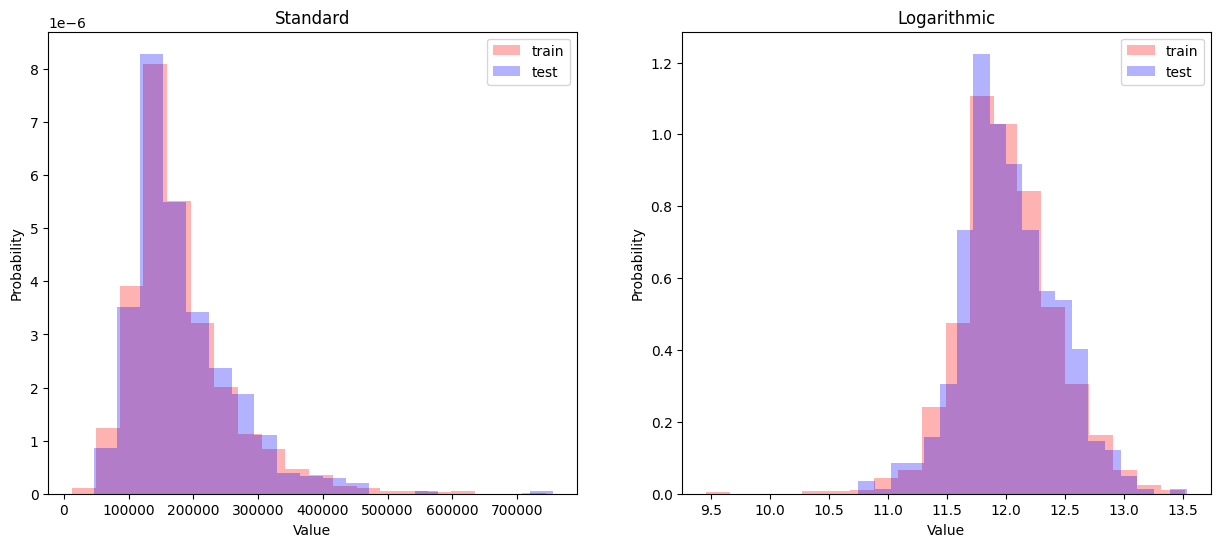

In [398]:
plot_both_distributions(Y_train, Y_test)

Как видите, если прологарифмировать таргеты, то их распределение станет более похоже на гауссовское. Интуиция подсказывает, что линейная регрессия с MSE loss-функцией должна лучше учиться на таких таргетах.

Попробуйте написать класс, который во время обучения логарифмирует таргет, а во время предсказания — наоборот, экспоненциирует. После чего обучите оба метода на обучающих данных и сравните значения метрик MAE (Mean Squared Error) и MSLE (Mean squared logarithmic error) на тесте.

exp(ln x) = x

Что должно быть в этом классе:
- Класс должен называться ```ExponentialLinearRegression```
- Класс должен иметь такой же fit-predict интерфейс, как и было до этого. На вход он получает оригинальные X и Y, а уже внутри происходит логарифмирование или экспоненциирование.
- Внутри этой модели будет работать [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Хочется, чтобы этому классу можно было передавать аргументы инициализации с помощью *args и **kwargs
- Чтобы потом этот класс можно было использовать в [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) в следующих пунктах, у него должны быть реализованы 5 методов
    1. ```__init__(self, *args, **kwargs)``` - все полученные аргументы передаются дальше в Ridge.
    2. ```fit(self, X, Y)``` - обучает класс, возвращает self.
    3. ```predict(self, X)``` - делает предсказание.
    4. ```get_params(deep=True)``` - возвращает dict с параметрами модели. Больще подробностей [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)
    5. ```set_params(**params)``` - передает нужные параметры в модель. Больше подробносте [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)
- Есть два подхода к тому как сделать все нужные методы:
    - Отнаследоваться от класса Ridge и переопределить методы fit и predict, внутри вызывая super() от отцовского класса.
    - Отнаследоваться от класса RegressorMixin и внутренним атрибутом класса сделать Ridge. Тогда все методы нужно будет писать руками.

In [399]:
from sklearn.base import BaseEstimator, RegressorMixin

class ExponentialLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, **params):
        self.model = Ridge(**params) # Инициализация Ridge регрессора с переданными параметрами

    def fit(self, X, Y):
        Y_log = np.log(Y) # Логарифмируем таргет
        self.model.fit(X, Y_log)
        return self

    def predict(self, X):
        Y_log = self.model.predict(X)
        return np.exp(Y_log) # Экспоненцирование таргета (exp(ln x) = x)
    
    def get_params(self, *args, **kwargs):
        return self.model.get_params(*args, **kwargs)

    def set_params(self, *args, **kwargs):
        self.model.set_params(*args, **kwargs)

**3. Реализуйте этот класс и сдайте в контест**.

In [400]:
from sklearn.metrics import mean_absolute_error

classic_regressor = Ridge()
exponential_regressor = ExponentialLinearRegression()

classic_regressor.fit(X_train, Y_train)
exponential_regressor.fit(X_train, Y_train)

classic_prediction = classic_regressor.predict(X_test)
exponential_prediction = exponential_regressor.predict(X_test)

print(f"MAE  : Classic : {mean_absolute_error(Y_test, classic_prediction)}  Exponential : {mean_absolute_error(Y_test, exponential_prediction)}")
print(f"MSLE : Classic : {root_mean_squared_logarithmic_error(Y_test, classic_prediction)} Exponential : {root_mean_squared_logarithmic_error(Y_test, exponential_prediction)}")

MAE  : Classic : 23821.97776100681  Exponential : 26818.6997865444
MSLE : Classic : 0.1950062123328133 Exponential : 0.21601027716185434


Иногда получается так, что разные обученные вами модели приводят к улучшению одних метрик и ухудшению других. Это абсолютно нормально и этому не надо удивляться.

Также зачастую случается так, что прирост по метрике не очень большой. И вы можете захотеть убедиться, что это реальное улучшение, а не просто случайная флуктуация. Для этого можно использовать подсчёт метрики про кросс-валидации (подробнее о ней можно почитать в соответствующей главе учебника). Суть метода в следующем:

- мы разбиваем (случайным образом!) доступную нам выборку на $K$ (часто $K=5$) частей, которые называются _фолдами_
- мы обучаем нашу модель $K$ раз, уча на всех фолдах, кроме одного, а на этом одном тестируя
- мы получаем $K$ значений метрики, которые вместе дают нам лучшее представление о том, как ведёт себя модель на разных разбиениях на трейн и тест. В качестве итоговой метрики можно, к примеру, взять среднее полученных значений

Сделать всё это можно с помощью обёртки [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), в которую можно подать модель, датасет и интересующую вас метрику. При этом оценку по кросс-валидации можно делать на всей доступной у вас выборке (ибо кросс-валидация уже включает разбиение на трейн и тест).

Вычислите оценки MAE по кросс-валидации обычной (не регуляризованной) линейной регрессии и ExponentialLinearRegression на объединении обучающей и тестовой выборок.

**4. Посчитайте и сдайте две оценки по кросс-валидации в Контест**.

По шагам вам нужно
1. Применить BaseDataPreprocessor к исходным данным
2. Объединить трейн и тест
3. Для первого числа использовать LinearRegression()
4. Для второго -ExponentialLinearRegression с Ridge()
5. Разбиение на фолды сделать с помощью `cv=KFold(n_splits=5, shuffle=True, random_state=42)`

Обратите внимание, что параметр scoring — это не совсем функция-метрика, а немного более сложный объект, который можно соорудить, например, с помощью обёртки [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer).

Также имейте в виду, что, вообще говоря, с дефолтным значением параметра `cv` кросс-валидация разбивает датасет на фолды детерминированным образом. Если вам нужно случайное разбиение, то в качестве cv стоит подать объект класса `sklearn.model_selection.KFold` или `sklearn.model_selection.StratifiedKFold`. Используйте

```
cv=KFold(n_splits=5, shuffle=True, random_state=42)
```

Также при написании кода для кросс-валидации вам может пригодиться знание о пайплайнах.

Представьте ситуацию. Прошел месяц с того момента, как вы построили модель, а теперь вам надо дообучить её на новых данных и активно применять для предсказания. Если вы не позаботились об инфраструктуре, то вам придётся рыскать по всему ноутбуку в поисках того, как вы предобрабатывали данные, какую модель учили, обязательно что-нибудь забудете и будете очень страдать. Поэтому человечество придумало пайплайны, которые позволяют объединить предобработку данных и обучение модели в один класс - pipeline. Его можно писать самому, либо взять из sklearn ([link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html))

В библиотеке scikit-learn (или sklearn) модуль Pipeline используется для упрощения процесса создания и управления последовательностью шагов обработки данных и моделей машинного обучения. Он позволяет объединить несколько шагов в одну цепочку, что облегчает процесс построения и оценки моделей, особенно когда требуется выполнить несколько предобработок перед обучением модели.

Как работает Pipeline?
Pipeline состоит из последовательности шагов, каждый из которых представляет собой кортеж с именем шага и объектом, реализующим метод fit. Каждый шаг, кроме последнего, должен иметь метод transform, который будет применяться к данным. Последний шаг должен иметь метод fit.

In [401]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

mae_scorer = make_scorer(mean_absolute_error)

# Объединение данных
X_concatenated = np.concatenate((X_train, X_test), axis=0) # BaseDataPreprocessor уже применен к X_train, X_test выше
Y_concatenated = np.concatenate((Y_train, Y_test), axis=0)

# Создадим пайплайны
pipeline_Linear = Pipeline([
    # ('preprocessor', BaseDataPreprocessor()),         #Наши данные уже обработаны, поэтому повторного вызова BaseDataPreprocessor не требуется
    ('regressor', LinearRegression())
])

pipeline_Exponential = Pipeline([
    # ('preprocessor', BaseDataPreprocessor()),         #Наши данные уже обработаны, поэтому повторного вызова BaseDataPreprocessor не требуется
    ('regressor', ExponentialLinearRegression())
])

# Кросс-валидация
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores_Linear = cross_val_score(pipeline_Linear, X_concatenated, Y_concatenated, cv=cv, scoring=mae_scorer)
print("Mean MAE (LinearRegression):", np.mean(scores_Linear))

scores_Exponential = cross_val_score(pipeline_Exponential, X_concatenated, Y_concatenated, cv=cv, scoring=mae_scorer)
print("Mean MAE (ExponentialLinearRegression):", np.mean(scores_Exponential))



Mean MAE (LinearRegression): 23222.643893618802
Mean MAE (ExponentialLinearRegression): 21166.681537752724


Для сдачи контеста, нужно разкомментировать ('preprocessor', BaseDataPreprocessor()), и получить метрику 23226, но я не вижу смысла обрабатывать данные повторно. При нормализации данных мы теряем информацию, но делаем данные более равномерными, что зачастую хорошо для модели, но в данном случае, при повторной нормализации, данные становятся менее качественными, метрика МАЕ становится хуже (принцип less=good), поэтому я решил оставить #('preprocessor', BaseDataPreprocessor())

### 5. Подбор гиперпараметров

Линейную регрессию почти всегда можно улучшить с помощью регуляризации. Но при этом у нас возникает **гиперпараметр** — коэффициент регуляризации, и подбирать его нужно правильно. Более подробно о подборе гиперпараметров вы можете прочитать в соответствующей главе учебника), а пока мы разберём самые базовые подходы.

В этой лабораторной вы познакомитесь с самым тривиальным способом — подбором по сетке. В данном случае это значит, что мы фиксируем несколько значений коэффициента регуляризации ```alpha``` и просто для каждого из них смотрим, что получится. Но важно отметить, что коэффициенты регуляризации стоит перебирать по _логарифмической_ сетке, например: `1e-2, 1e-1, 1, 1e+1, 1e+2`.


Логарифмическая сетка называется так потому, что её масштабирование основано на логарифмических интервалах. Это означает, что значения на такой сетке распределены по логарифмической шкале, а не по линейной. Рассмотрим нашу сетку: `1e-2, 1e-1, 1, 1e+1, 1e+2`.

В этой сетке значения соответствуют степеням числа 10:

- \(1e-2 = 10^{-2} = 0.01\)
- \(1e-1 = 10^{-1} = 0.1\)
- \(1 = 10^0 = 1\)
- \(1e+1 = 10^1 = 10\)
- \(1e+2 = 10^2 = 100\)

Между соседними значениями в логарифмической сетке существует одинаковый логарифмический шаг. Например:

- \(\log_{10}(0.1) - \log_{10}(0.01) = -1 - (-2) = 1\)
- \(\log_{10}(1) - \log_{10}(0.1) = 0 - (-1) = 1\)
- \(\log_{10}(10) - \log_{10}(1) = 1 - 0 = 1\)
- \(\log_{10}(100) - \log_{10}(10) = 2 - 1 = 1\)

Каждое из этих интервалов в логарифмическом масштабе равно 1. Поэтому сетка распределена равномерно в логарифмическом масштабе, хотя в линейном масштабе расстояния между точками увеличиваются или уменьшаются экспоненциально.

Такой подход удобен, например, при работе с данными, охватывающими широкий диапазон значений, поскольку он позволяет лучше визуализировать и анализировать данные, которые могут варьироваться от очень маленьких до очень больших чисел.


Разобравшись, что перебирать, перейдём к вопросу о том, как оценивать. Есть два основных подхода:

*   Train-Val-Test split. Датасет делится на три части, на одной модели учатся, на другой подбираются гиперпараметры, на третьей считаются финальные метрики. Этот метод довольно шумный, зато быстрый.
*   Кроссвалидация. Она значительно дольше, но надёжней. В этом пункте мы воспользуемся именно ей.


Возьмите класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) из scikit-learn и с его помощью подберите гиперпараметр ```alpha``` для линейной регрессии с L2-регуляризацией (соответствующий класс зовут Ridge). Возможно, для минимизации разных метрик (_root_mean_squared_logarithmic_error_ и _mean_absolute_error_) понадобятся разные значения гиперпараметров. Выберите из сетки ```np.logspace(-3, 3, num=7, base=10.)``` значение, которое минимизирует _root_mean_squared_logarithmic_error_ для _ExponentialLinearRegression_ и

**5. Загрузите оптимальное значение коэффициента регуляризации в Контест**.

Параметр `cv` оставьте дефолтным или возьмите `cv=5` (результат не поменяется). Будьте внимательны: по умолчанию `best_score_` у `GridSearchCV` - это _самое большое значение_. Чтобы не попасться в эту ловушку, обратите внимание на параметр `greater_is_better` функции `make_scorer`.

In [402]:
from sklearn.model_selection import GridSearchCV

rmsle_scorer = make_scorer(root_mean_squared_logarithmic_error, greater_is_better=False)

pipeline_Exponential = Pipeline([
    ('model', ExponentialLinearRegression())
])

param_grid = {
    'model__alpha': np.logspace(-3, 3, num=7, base=10.)
}

grid_search_rmsle = GridSearchCV(estimator=pipeline_Exponential, param_grid=param_grid, scoring=rmsle_scorer, cv=5)
grid_search_rmsle.fit(X_train, Y_train)

print("Best alpha for RMSLE:", grid_search_rmsle.best_params_['model__alpha'])

Best alpha for RMSLE: 10.0


Почему мы использовали пайплайн, а не просто model = ExponentialLinearRegression()?

Когда вы используете GridSearchCV с пайплайном, он автоматически обрабатывает внутренние шаги пайплайна и правильно передает параметры для настройки. Однако, когда вы передаете просто модель, GridSearchCV не знает, как правильно обрабатывать параметры модели, особенно если параметры находятся внутри пайплайна. Если вы передаете только модель, то GridSearchCV пытается применить параметры напрямую к модели, что может привести к ошибкам, если модель не инициализирована правильно или параметры не передаются корректно.





Почему мы использовали X_train, а не X_concatenated?

В данном случае мы используем `X_train` и `Y_train` для настройки модели и поиска лучших гиперпараметров, поскольку цель `GridSearchCV` — выбрать наилучшие параметры модели на основе кросс-валидации на обучающем наборе данных. Вот почему использование `X_train` и `Y_train` является стандартной практикой:

1. **Целостность данных:** При обучении и оценке модели, важно, чтобы данные для кросс-валидации и тестирования были независимыми. Если бы вы использовали весь набор данных (`X_train + X_test`) для кросс-валидации, это могло бы привести к переоценке модели, поскольку данные для кросс-валидации и для тестирования были бы перепутаны.

2. **Кросс-валидация:** `GridSearchCV` разделяет данные `X_train` и `Y_train` на несколько подмножеств (фолдов) и выполняет кросс-валидацию. Это позволяет более надежно оценить производительность модели на различных подмножествах данных и избежать переобучения. Если бы вы использовали весь набор данных, то результат оценки мог бы быть неточным.

3. **Тестирование:** После того как вы определили лучшие параметры с помощью `GridSearchCV` на обучающих данных, вы используете `X_test` и `Y_test` для окончательной оценки модели, чтобы получить представление о ее производительности на данных, которые модель не видела ранее.

4. **Разделение данных:** Важно держать тестовые данные полностью вне процесса подбора гиперпараметров и кросс-валидации. Это гарантирует, что окончательная оценка модели будет объективной и не предвзятой.

Поэтому, в процессе настройки модели и подбора гиперпараметров, мы используем только обучающий набор данных. `X_test` и `Y_test` используются отдельно для окончательной проверки производительности модели после того, как наилучшие гиперпараметры были выбраны.

### 6. Линейная модель своими руками

В этом разделе вы напишете собственный класс линейной модели, чтобы лучше разобраться, как работает обучение с помощью SGD.

Линейная модель делает предсказание по такой формуле:
$$
\hat{y_i} = \langle \vec{w}, \vec{x_i} \rangle + b
$$
Здесь $\vec{w}$ и b - обучаемые параметры. $\vec{x_i}$ - вектор фичей данного примера.
$\vec{w}$ и b находятся из задачи минимизации лосс функции:

$$
\vec{w}, b = {argmin}_{\vec{w}, b}(L) \ ; \ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 + \lambda \vec{w}^T\vec{w}
$$

Наша лосс функция состоит из:

1. MSE: 
   $$
   \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 
   $$

2. L2 регуляризация: 
   $$
   \lambda \vec{w}^T \vec{w}
   $$

Почему формула L2 регуляризации такая, а не $\lambda \sum_{j=1}^{d} w_j^2$?

Векторное представление $\vec{w}^T\vec{w}$ в лосс функции соответствует сумме квадратов элементов вектора $\vec{w}$:

- Пусть $\vec{w}$ — это вектор $[w_1, w_2, \ldots, w_d]$, где $d$ — количество фичей (размерность вектора).

- Произведение $\vec{w}^T \vec{w}$ — это скалярное произведение вектора $\vec{w}$ на себя:
  $$
  \vec{w}^T \vec{w} = w_1^2 + w_2^2 + \ldots + w_d^2
  $$

Таким образом, выражение $\lambda \vec{w}^T \vec{w}$ — это просто удобное матрично-векторное представление $L2$-регуляризации. Оно эквивалентно $\lambda \sum_{j=1}^{d} w_j^2$, что и есть штраф, добавляемый за большие значения весов, чтобы предотвратить переобучение.

Задачу минимизации лосс функции мы будем решать градиентным спуском. Для этого надо найти градиенты лосса по параметром модели.

$$
\nabla_b L = \frac{2}{N} sum(X \vec{w} + b - \vec{y})\\
\nabla_{\vec{w}} L = \frac{2}{N} X^T(X \vec{w} + b - \vec{y}) + 2\lambda \vec{w}
$$

Теперь давайте реализуем этот алгоритм ввиде класса с методами fit-predict.
Что в нем должно быть:
1. Класс должен называться ```SGDLinearRegressor```
2. Класс должен быть отнаследован от sklearn-овского класса [RegressorMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html)
3. Класс должен инициализироваться со следующими гиперпараметрами:

    a. ```lr``` — learning rate. Длина шага градиентного спуска

    b. ```regularization``` — коэффициент λ из формулы выше
    
    c. ```delta_converged``` — устанавливает условие окончание обучение. В тот момент когда норма разности весов на соседних шагах градиентного спуска меньше чем ```delta_converged``` алгоритм перкращает обновлять веса
    
    d. ```max_steps``` — максимальное число шагов градиентного спуска
    
    e. ```batch_size``` — размер батча

4. Реализуйте **стохастический** градиентный спуск. На каждом шагу градиентного спуска должен формироваться батч размера ```batch_size``` из матрицы признаков. Это нужно для того чтобы алгоритм быстрее сходился. Батч может выбираться случайно на каждом шаге градиентного спуска, либо каждую эпоху можно перемешивать трейн выборку и итерироваться батчами по ней.

Обратите внимание при реализации SGD на следующие моменты (частые ошибки):
* не перепутайте, какие коэффициенты в SGD стоят при самой функции потерь, а какие — при регуляризационном члене. Правильный вариант: $\frac{\alpha}{batch\_size}$ при градиенте MSE, $\alpha\lambda$ при градиенте регуляризатора.
* для остановки нужно сравнивать норму, а не ее квадрат
* для правильного решения нужно не итерироваться по батчу,  а перемножать матрицы (иначе не зайдет по TL)
* метод `predict` должен возвращать одномерный numpy array (не двумерный вектор-столбец формы (X.shape[1], 1))

In [403]:
class SGDLinearRegressor(RegressorMixin):
    def __init__(self,
                 lr=0.01, regularization=1., delta_converged=1e-3, max_steps=1000,
                 batch_size=64):
        self.lr = lr
        self.regularization = regularization
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size

        self.W = None
        self.b = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape # n_samples - количество строк (количество примеров); n_features - количество признаков
        # Инициализация весов и смещения
        self.W = np.zeros(n_features)
        self.b = 0

        for step in range(self.max_steps):
            # Перемешиваем данные для создания случайных батчей
            indices = np.arange(n_samples) # аналог функции 'range' только создается одномерный массив 
            np.random.shuffle(indices) # перемешаем индексы
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]

            for start_idx in range(0, n_samples, self.batch_size): # от 0 до n_samples с шагом batch_size
                end_idx = start_idx + self.batch_size
                X_batch = X_shuffled[start_idx:end_idx]
                Y_batch = Y_shuffled[start_idx:end_idx]

                # Предсказание
                Y_pred = np.dot(X_batch, self.W) + self.b
                
                # Вычисление градиентов
                error = Y_pred - Y_batch
                grad_w = (2 / self.batch_size) * np.dot(X_batch.T, error) + 2 * self.regularization * self.W
                grad_b = (2 / self.batch_size) * np.sum(error)

                # Обновление весов и смещения
                self.W -= self.lr * grad_w
                self.b -= self.lr * grad_b

            # Проверка условия остановки
            if np.linalg.norm(self.lr * grad_w) < self.delta_converged:
                break

    def predict(self, X):
        return np.dot(X, self.W) + self.b

### Понятие стохастического градиентного спуска

- **Градиентный спуск** — это алгоритм оптимизации, используемый для минимизации функции потерь. Он обновляет параметры модели (например, веса) путем перемещения в направлении, противоположном градиенту функции потерь. Это позволяет находить минимум функции.

- **Стохастический градиентный спуск (SGD)** — это разновидность градиентного спуска, в которой обновление параметров происходит для одного или нескольких случайно выбранных примеров из обучающего набора данных, а не для всех примеров. Это делает алгоритм более быстрым и позволяет избежать локальных минимумов за счет добавления "шумов" в процесс обновления.

### Использование батчей

- **Батч (Batch)** — это подмножество данных, которое используется для одного обновления параметров модели. Обучение с использованием батчей находится между двумя крайностями: полным градиентным спуском (использует весь набор данных за раз) и SGD (использует один пример за раз).

- **Размер батча (batch size)** — это количество примеров, которые обрабатываются перед обновлением параметров модели. Например, если у вас 1000 примеров и размер батча равен 100, то за одну эпоху алгоритм сделает 10 шагов.

### Алгоритм с батчами

1. **Перемешивание данных**: На каждой эпохе или каждом шаге обучения данные перемешиваются, чтобы батчи были случайными. Это помогает избежать систематической ошибки, которая может возникнуть, если данные имеют какую-то внутреннюю упорядоченность.

2. **Формирование батчей**: После перемешивания данные разбиваются на батчи фиксированного размера (`batch_size`). Каждый батч будет использоваться для вычисления градиентов и обновления параметров модели.

3. **Обновление параметров**: Для каждого батча:
   - Вычисляются предсказания модели.
   - Вычисляется ошибка и градиенты функции потерь.
   - Параметры модели обновляются с учетом вычисленных градиентов.

In [404]:
# Check yourself
model = SGDLinearRegressor()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(Y_test.shape, prediction.shape)
print("MAE : ", mean_absolute_error(Y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(Y_test, prediction))

(586,) (586,)
MAE :  25510.549825215567
Mean log :  0.18862893826280525


### 7. Категориальные признаки

В самом начале ноутбука мы отбросили категориальные фичи, хотя они могут помочь нам сделать модель лучше. Давайте же научимся ими пользоваться.

Самый простой подход — это закодировать значения категориального признака числами, скажем, от $0$ до $C-1$, где $C$ — количество значений категориального признака. Иногда это может сработать, но для этого нужно, чтобы между значениями признака были определены отношения больше/меньше (такие признаки называются _ординальными_), причём соотношения между значениями должны быть более-менее линейными. В целом, не очень частая ситуация, поэтому так мы делать не будем.

Вместо этого мы будем использовать OneHotEncoding. Пусть некоторая категориальная фича имеет $C$ уникальных значений. Давайте эту фичу закодируем в виде $C$ столбцов, каждый из которых соответствует некоторому уникальному значению категориальной фичи. Для каждого элемента выборки будем класть единичку в столбец, соответствующий этой фиче, и нолики в остальные.

У этого метода есть недостаток. Если категориальная фича принимает слишком много значений, то вы нагенерируете много новых столбцов, каждый из которых будет содержать мало информации. Из-за них моделька может переобучиться.

Этот метод имплементирован [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). У него есть пара важных гиперпараметров, которые стоит упомянуть:
- ```handle_unknown``` - управляет обработкой незнакомых категорий на этапе `transform`. Число уникальных значений (и число столбцов) настраивается на обучающей выборке, и при дальнейшем применении может появиться значение, которого ещё не было. Если указать ```handle_unknown="ignore"```, все поля для такого объекта будут заполнены нулями.
- ```drop``` - если делать one-hot-encoding так как это описано выше, то сумма всех столбцов, соответствующих значениям категориальной фичи, будет равна единичному вектору. А такой вектор уже есть (он соответствует свободному члену). То есть признаки становятся линейно зависимыми, и это сломает процесс обучения линейной модели. Поэтому есть смысл для каждой фичи отбрасывать одну из получившихся колонок (```drop="first"```) или хотя бы делать это только для бинарных фичей (```drop="if_binary"```)

Подробнее о drop.

### Что такое мультиколлинеарность?

Мультиколлинеарность возникает, когда в наборе данных есть два или более признаков (столбца), которые сильно связаны между собой. В контексте линейных моделей это проблема, потому что модель не может четко определить, какой именно признак влияет на целевую переменную. В результате это может привести к нестабильным коэффициентам модели.

### Почему возникает проблема с one-hot-encoding?

Когда мы используем one-hot-encoding, мы создаем новый столбец для каждого возможного значения категориальной переменной. Например, если у нас есть переменная "Цвет" с тремя значениями: "Красный", "Зеленый", "Синий", то one-hot-encoding создаст три столбца. Каждый объект будет представлен как вектор с одной единицей и двумя нулями. Например:
- "Красный" будет (1, 0, 0)
- "Зеленый" будет (0, 1, 0)
- "Синий" будет (0, 0, 1)

Если у нас в наборе данных есть столбец-свободный член (например, константа 1), сумма этих столбцов для каждой строки всегда равна 1. Это и создает избыточность, так как мы можем предсказать значение любого из этих столбцов, зная другие.


Проблема в том, что сумма всех этих векторов для любой строки будет равна 1, если у тебя есть столбец-свободный член в модели (например, столбец с единицами). Это создает линейную зависимость: один из этих векторов можно выразить через другие. Именно эта зависимость и называется мультиколлинеарностью, и она может осложнять обучение модели, особенно линейной, потому что модель не сможет различить влияние различных признаков на целевую переменную.

### Пример с зависимостью

Если у нас есть три столбца "Цвет_Красный", "Цвет_Зеленый" и "Цвет_Синий", то любой из них можно выразить через два других:

- "Цвет_Красный" = 1 - ("Цвет_Зеленый" + "Цвет_Синий")

Это значит, что информация в одном из этих столбцов полностью определяется информацией в других. Поэтому, чтобы избежать этой избыточности и обеспечить модель нужной информацией без зависимости, удаляют один из столбцов. В таком случае каждая категория по-прежнему будет однозначно идентифицироваться, но уже без линейной зависимости между признаками. 

### Преимущество удаления столбца

Когда один столбец удален, например "Цвет_Красный", модель по оставшимся столбцам может однозначно определить все возможные категории:

- (0, 0) будет "Красный"
- (1, 0) будет "Зеленый"
- (0, 1) будет "Синий"

Эта методика исключает лишнюю информацию и делает обучение модели более стабильным.

Таким образом, удаление одного столбца при one-hot-encoding помогает избежать проблемы мультиколлинеарности и делает модель более устойчивой и надежной.

В этом пункте вам надо еще раз предобработать данные, добавив в них часть категориальных фичей, закодированных OneHotEncoding-ом. После этого обучите классификатор заново и выбейте лучшую метрику на тестовой выборке. А именно, мы добавим фичи "Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning". Используйте значение параметра handle_unknown="ignore".

*На практике в некоторых версиях scikit-learn есть проблема с совместимостью `handle_unknown="ignore"` и `drop="first"` одновременно, поэтому вторым можно пожертвовать.

Класс будет наследоваться от BaseDataPreprocessor, так что в него можно будет передавать нужные для BaseDataPreprocessor параметры. Также это позволит не переписывать заново то, что происходит в базовом классе, а просто взывать к ним с помощью конструкции `super`.

In [405]:
from sklearn.preprocessing import OneHotEncoder

interesting_columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]

class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, columns_to_encode: List[str], continue_columns: Optional[List[str]]):
        super().__init__(needed_columns=continue_columns)
        self.columns_to_encode = columns_to_encode
        self.encoder = OneHotEncoder(handle_unknown='ignore')

    def fit(self, data: pd.DataFrame, *args):
        # Fit the encoder only on the specified columns
        self.encoder.fit(data[self.columns_to_encode])
        # Fit the scaler using the parent class method 
        super().fit(data, *args) # Это для масштабирования числовых признаков.
                                 # В родительском методе fit у BaseDataPreprocessor есть фильтрация needed_columns,
                                 # так что ничего страшного в том, что мы передаем все данные (категориальные + числовые)
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        # One-hot encode the specified columns
        data_encoded = self.encoder.transform(data[self.columns_to_encode])
        # Scale the other columns using the parent class method
        data_scaled = super().transform(data) # Тут так же в методе transform у родительского класса BaseDataPreprocessor есть фильтрация needed_columns
        # Concatenate the encoded and scaled data
        return np.concatenate((data_encoded.toarray(), data_scaled), axis=1)


Обучите модель с добавленными категориальными фичами. Получилось ли улучшить её качество?

In [406]:
# Без кодирования
model = ExponentialLinearRegression()
model.fit(X_train, Y_train)

base_prediction = model.predict(X_test)
print("RMSLE :", root_mean_squared_logarithmic_error(Y_test, base_prediction))

# C one hot кодированием
ohe_preprocessor = OneHotPreprocessor(interesting_columns, continuous_columns)
X_train_ohe = ohe_preprocessor.fit_transform(data_train)
X_test_ohe = ohe_preprocessor.transform(data_test)

model = ExponentialLinearRegression()
model.fit(X_train_ohe, Y_train)

ohe_prediction = model.predict(X_test_ohe)
print("RMSLE (One hot encoder) :", root_mean_squared_logarithmic_error(Y_test, ohe_prediction))


RMSLE : 0.21601027716185434
RMSLE (One hot encoder) : 0.18560982800718145


### 8. Pipeline

Представьте ситуацию. Прошел месяц с того момента, как вы построили модель, а теперь вам надо дообучить её на новых данных и активно применять для предсказания. Если вы не позаботились об инфраструктуре, то вам придётся рыскать по всему ноутбуку в поисках того, как вы предобрабатывали данные, какую модель учили, обязательно что-нибудь забудете и будете очень страдать. Поэтому человечество придумало пайплайны, которые позволяют объединить предобработку данных и обучение модели в один класс — pipeline. Его можно писать самому, либо взять из sklearn ([link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)).

**7. Напишите пайплайн, объединяющий использованную нами базовую предобработку данных (BaseDataPreprocessor и OneHotPreprocessor), а также линейную регрессию с L2-регуляризацией, и сдайте его в Контест.**

In [407]:
def make_ultimate_pipeline(continuous_columns, categorical_columns):
    one_hot_preprocessor = OneHotPreprocessor(columns_to_encode=categorical_columns, continue_columns=continuous_columns)
    
    # Пайплайн с двумя препроцессорами и линейной регрессией
    pipeline = Pipeline([
        ('preprocessorOneHot', one_hot_preprocessor), # Масштабирование данных числовых фичей включено
        ('regressor', ExponentialLinearRegression())
    ])
    
    return pipeline

In [408]:
pipeline = make_ultimate_pipeline(continuous_columns, categorical_columns)
pipeline.fit(data_train, Y_train)
y_pred = pipeline.predict(data_test)

print("RMSLE (Pipeline):", root_mean_squared_logarithmic_error(Y_test, y_pred))

RMSLE (Pipeline): 0.16879940919250203


Ранее мы получили RMSLE (One hot encoder) : 0.18560982800718145 </br>
Сейчас мы получили RMSLE (Pipeline): 0.16879940919250203

Почему метрика стала чуть лучше?
Возможно, потому что пайплайн может включать дополнительные шаги или оптимизации, которые неявно выполняются, например, правильное обращение с пропущенными значениями или кодирование категорий, которое отличается от ручного подхода.

В этом пункте вы попробуете сделать что-то поинтереснее и загрузите плоды ваших трудов в Контест.

Попробуйте усовершенствовать предобработку данных, добавляя или выкидывая фичи, придумывая функции от признаков так, чтобы улучшить качество классификатора.

Ещё несколько базовых идей о том, что можно было бы попробовать:

- Постройте гистограммы значений признаков. Вы обнаружите, что некоторые из них почти всегда принимают одно и то же значение. Для начала их можно просто выкинуть.
- Почистите выбросы. У некоторых объектов значения каких-то признаков могут сильно выбиваться, и это будет мешать регрессии обучиться. Вообще говоря, такие объекты можно выкидывать, но с текущей архитектурой пайплайна вам будет трудно это настроить. Так что вы можете пока заменять их на более разумные значения.
- Мы добавили лишь несколько категориальных признаков, а на самом деле многие из них могут быть полезными.
- Можно дискретизовать непрерывные фичи. Самый банальный пример: если непрерывная фича принимает всего несколько значений, её можно попробовать проинтерпретировать, как категориальную, и подать в one-hot энкодер. Но можно и как-то ещё разбивать по порогам.
- Можно делать и более сложные преобразования. Например в датасете есть координаты квартиры, которые по идее сами по себе мало чего дают нашему регрессору. С другой стороны, по ним можно оценить центр города (или просто найти его на карте) и использовать в качестве фичи расстояние до центра города, которое может естественным образом влиять на цену жилья.
- Не забывайте настраивать коэффициент регуляризации: для разных датасетов оптимальное значение будет разным.

**В контест вам нужно будет сдать свой класс модели**. Он будет обучаться и тестироваться на новом и неизвестном вам разбиении датасета на трейн и тест по метрике `root_mean_squared_logarithmic_error`.
В контесте будет специально проверено, что вы сдаёте именно `Pipeline`.

Не забывайте, что вместе с пайплайном вам нужно отправить и все самописные классы, которые в нём участвуют.


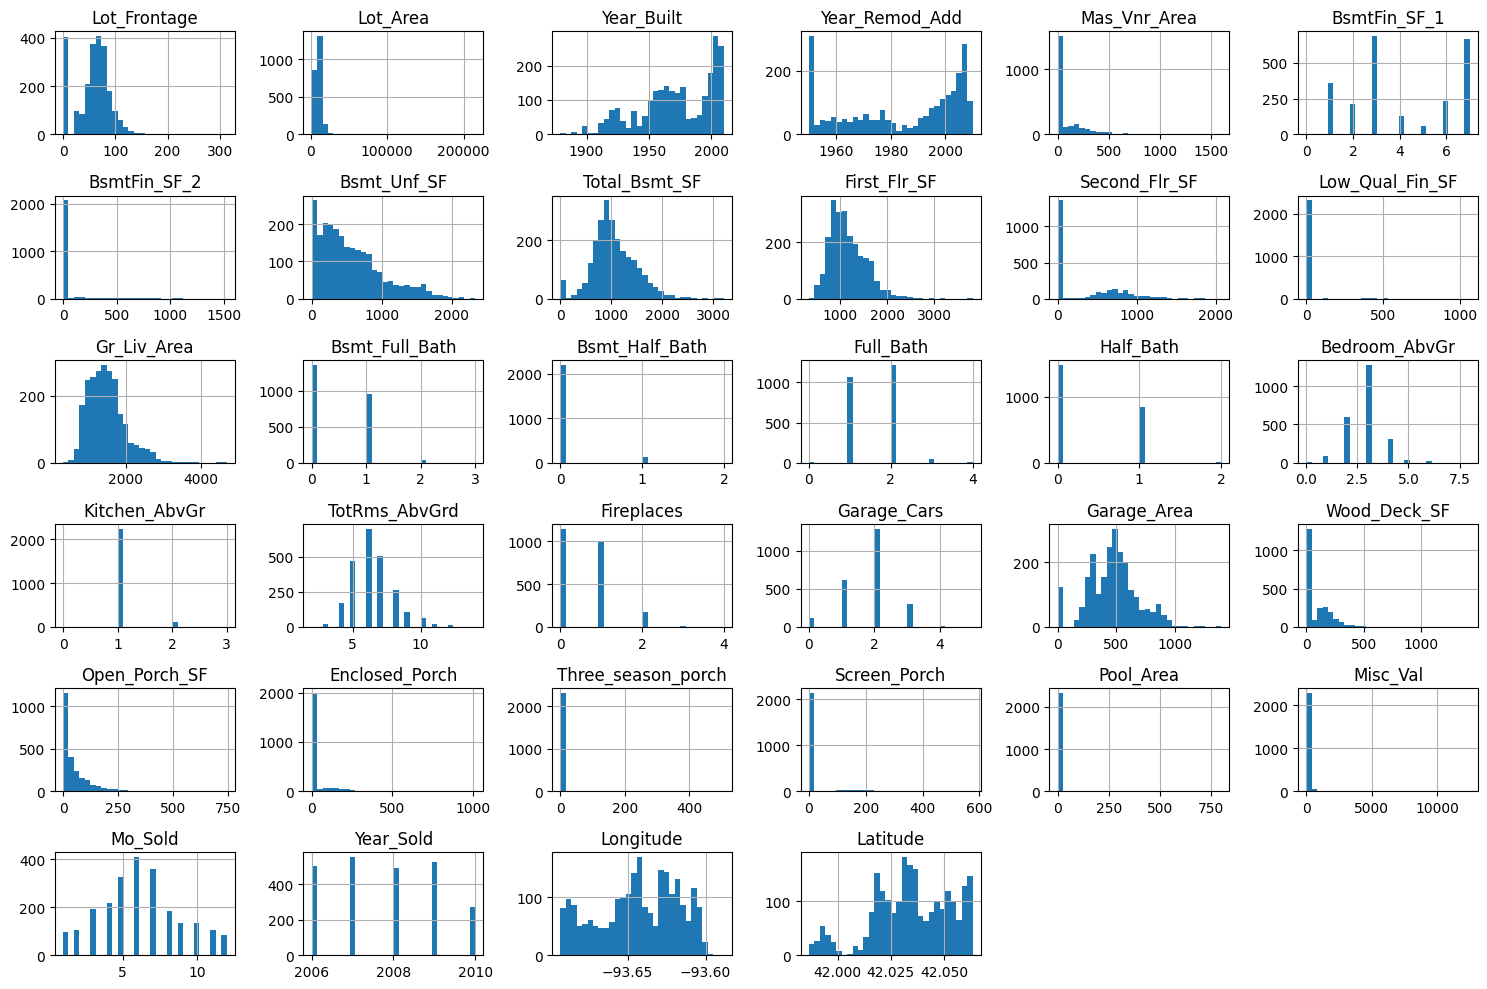

Удаляем признаки с низкой вариативностью: ['Year_Sold', 'Longitude', 'Latitude']


In [409]:
# Построение гистограмм и удаление неинформативных признаков

import matplotlib.pyplot as plt

# Функция для построения гистограмм для числовых признаков
def plot_histograms(data: pd.DataFrame):
    numeric_data = data.select_dtypes(include=[np.number])
    numeric_data.hist(bins=30, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

# Удаление признаков с низкой вариативностью для числовых признаков
def remove_low_variance_features(data: pd.DataFrame, threshold: float = 0.01) -> pd.DataFrame:
    numeric_data = data.select_dtypes(include=[np.number])
    low_variance_cols = [col for col in numeric_data.columns if numeric_data[col].std() / (numeric_data[col].mean() if numeric_data[col].mean() != 0 else 1) < threshold]
    print(f"Удаляем признаки с низкой вариативностью: {low_variance_cols}")
    return data.drop(columns=low_variance_cols)

plot_histograms(data_train)
clear_data_train = remove_low_variance_features(data_train)


In [416]:
# Очистка выбросов

# Метод межквартильного размаха (IQR) для определения и удаления выбросов в числовых данных
def handle_outliers(data: pd.DataFrame) -> pd.DataFrame:
    for column in data.select_dtypes(include=[np.number]).columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        median = data[column].median()
        
        print(f"Column: {column}")
        print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
        print(f"Median: {median}")
        
        # Заменяем выбросы
        data[column] = np.where(data[column] < lower_bound, median, data[column])
        data[column] = np.where(data[column] > upper_bound, median, data[column])
    
    return data

# Пример использования
clear_data_train = handle_outliers(data_train)

# Находим удаленные данные
removed_data = data_train[~data_train.apply(tuple, axis=1).isin(clear_data_train.apply(tuple, axis=1))]

Column: Lot_Frontage
Q1: 42.0, Q3: 78.0, IQR: 36.0
Lower bound: -12.0, Upper bound: 132.0
Median: 63.0
Column: Lot_Area
Q1: 8125.0, Q3: 10625.0, IQR: 2500.0
Lower bound: 4375.0, Upper bound: 14375.0
Median: 9451.0
Column: Year_Built
Q1: 1954.0, Q3: 2000.0, IQR: 46.0
Lower bound: 1885.0, Upper bound: 2069.0
Median: 1973.0
Column: Year_Remod_Add
Q1: 1964.0, Q3: 2003.0, IQR: 39.0
Lower bound: 1905.5, Upper bound: 2061.5
Median: 1992.0
Column: Mas_Vnr_Area
Q1: 0.0, Q3: 0.0, IQR: 0.0
Lower bound: 0.0, Upper bound: 0.0
Median: 0.0
Column: BsmtFin_SF_1
Q1: 3.0, Q3: 7.0, IQR: 4.0
Lower bound: -3.0, Upper bound: 13.0
Median: 3.0
Column: BsmtFin_SF_2
Q1: 0.0, Q3: 0.0, IQR: 0.0
Lower bound: 0.0, Upper bound: 0.0
Median: 0.0
Column: Bsmt_Unf_SF
Q1: 216.0, Q3: 732.5, IQR: 516.5
Lower bound: -558.75, Upper bound: 1507.25
Median: 457.0
Column: Total_Bsmt_SF
Q1: 816.0, Q3: 1246.5, IQR: 430.5
Lower bound: 170.25, Upper bound: 1892.25
Median: 992.0
Column: First_Flr_SF
Q1: 874.75, Q3: 1361.0, IQR: 486.2

In [415]:
removed_data

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude


Рассмотрим, например, Column: Lot_Frontage:

1. **Q1 (Первый квартиль)**: Значение 42.0 означает, что 25% наблюдений в столбце `Lot_Frontage` имеют значения ниже 42.0.

2. **Q3 (Третий квартиль)**: Значение 78.0 означает, что 75% наблюдений имеют значения ниже 78.0. 

3. **IQR (Межквартильный размах)**: Значение 36.0, которое рассчитывается как разница между Q3 и Q1 (78.0 - 42.0 = 36.0). IQR показывает диапазон значений, в котором находится центральные 50% данных.

4. **Lower bound (Нижняя граница)**: Значение -12.0, рассчитываемое как `Q1 - 1.5 * IQR` (42.0 - 1.5 * 36.0 = -12.0). Все значения ниже этой границы считаются выбросами. Поскольку -12.0 — это значение ниже возможного диапазона для `Lot_Frontage`, оно является некорректным и в реальных данных выбросов ниже этого значения быть не может.

5. **Upper bound (Верхняя граница)**: Значение 132.0, рассчитываемое как `Q3 + 1.5 * IQR` (78.0 + 1.5 * 36.0 = 132.0). Все значения выше этой границы считаются выбросами.

6. **Median (Медиана)**: Значение 63.0 — это среднее значение данных в столбце `Lot_Frontage`.

### Значение для нашего случая

- **Нижняя граница** (-12.0) не имеет смысла, так как значения `Lot_Frontage` не могут быть отрицательными. Следовательно, все значения в столбце `Lot_Frontage` больше этой границы.
  
- **Верхняя граница** (132.0) — это максимальная допустимая граница для значений в столбце. Если есть значения выше этой границы, они считаются выбросами.

### Как это объясняет ваш результат

- Поскольку все значения в вашем столбце `Lot_Frontage` находятся между 42.0 и 78.0 и не превышают верхнюю границу 132.0, нет данных, которые были бы заменены на медиану. 

- В данном случае все данные в пределах допустимого диапазона.

### Остальные случаи

Аналогично рассмотрим остальные случаи и получим, что `removed_data` пуст.

Ранее мы вычисляли лучший гиперпараметр для ExponentialLinearRegression с обработанными данными X_train, теперь вычислим лучший гиперпараметр для Ridge() с данными clear_data_train

In [417]:
# 3. Настройка коэффициента регуляризации
def tune_regularization(X, y):
    ridge = Ridge()
    params = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Пример значений
    grid_search = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_log_error')
    grid_search.fit(X, y)
    print(f"Лучший параметр alpha: {grid_search.best_params_['alpha']}")
    return grid_search.best_estimator_

X_train_transformed = pipeline.named_steps['preprocessorOneHot'].transform(clear_data_train)
best_model = tune_regularization(X_train_transformed, Y_train)


Лучший параметр alpha: 10.0


In [418]:
def make_ultimate_pipeline_with_hyperparameter(continuous_columns, categorical_columns):
    one_hot_preprocessor = OneHotPreprocessor(columns_to_encode=categorical_columns, continue_columns=continuous_columns)
    
    # Пайплайн с двумя препроцессорами и линейной регрессией
    pipeline = Pipeline([
        ('preprocessorOneHot', one_hot_preprocessor), # Масштабирование данных числовых фичей включено
        ('regressor', Ridge(alpha=10.0)) # добавили, что гиперпараметр alpha = 10.0
    ])
    
    return pipeline

In [420]:
pipeline = make_ultimate_pipeline_with_hyperparameter(continuous_columns, categorical_columns)
pipeline.fit(clear_data_train, Y_train)
y_pred = pipeline.predict(data_test)

print("RMSLE (New pipeline):", root_mean_squared_logarithmic_error(Y_test, y_pred))

RMSLE (New pipeline): 0.15545403665956997


У нас получилось немного улучшить метрику! :)

Было: RMSLE (Pipeline): 0.16879940919250203 </br>
Стало: RMSLE (New pipeline): 0.15545403665956997